### Data

### create a data dictionary

* age: Displays the age of the individual.

* sex: Displays the gender of the individual using the following format : 1 = male 0 = female

* cp- Chest-pain type: displays the type of chest-pain experienced by the individual using the following format : 0 = typical angina 1 = atypical angina 2 = non — anginal pain 3 = asymptotic

* trestbps- Resting Blood Pressure: displays the resting blood pressure value of an individual in mmHg (unit). anything above 130-140 is typically cause for concern.

* chol- Serum Cholestrol: displays the serum cholesterol in mg/dl (unit)

* fbs- Fasting Blood Sugar: compares the fasting blood sugar value of an individual with 120mg/dl. If fasting blood sugar > 120mg/dl then : 1 (true) else : 0 (false) '>126' mg/dL signals diabetes

* restecg- Resting ECG : displays resting electrocardiographic results 0 = normal 1 = having ST-T wave abnormality 2 = left ventricular hyperthrophy

* thalach- Max heart rate achieved : displays the max heart rate achieved by an individual.

* exang- Exercise induced angina : 1 = yes 0 = no

* oldpeak- ST depression induced by exercise relative to rest: displays the value which is an integer or float.

* slope- Slope of the peak exercise ST segment : 0 = upsloping: better heart rate with excercise (uncommon) 1 = flat: minimal change (typical healthy heart) 2 = downsloping: signs of unhealthy heart

* ca- Number of major vessels (0–3) colored by flourosopy : displays the value as integer or float.

* thal : Displays the thalassemia : 1,3 = normal 6 = fixed defect 7 = reversible defect: no proper blood movement when excercising

* target : Displays whether the individual is suffering from heart disease or not : 1 = yes 0 = no

## 3.Evaluation 
>if we can gave 95% accuracy at predicting whetehr or not a patient has a heart disease during the proof of concept. We will pursue the project

In [74]:
#Regular EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

 # we want our plot to appear inside the notebook
%matplotlib inline

# Models from scikit learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)


In [2]:
df = pd.read_csv("heart_dis.csv")
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
4,57,female,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,yes


#EDA
The goal is to become more familiar with dataset and become a subject matter expert on the data

1. what question are we trying to answer
2. What kind of Data do we have and how do we treat different types?
3. what is missin g from the data and how do we ddeal with it
4. where are the outliers and why should we care about them
5. How do we add or change or remove features to get more out of the data

In [3]:
# how many target class do we have ?
percentage_by_category = df['target'].value_counts(normalize=True) * 100

# Apply the f-string format to each value in the Series
percentage_by_category_formatted = percentage_by_category.apply(lambda x: f"{x:.2f}%")

# Display the formatted percentages
print(percentage_by_category_formatted)

yes    54.46%
no     45.54%
Name: target, dtype: object


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    int64  
 3   trestbps  299 non-null    float64
 4   chol      302 non-null    float64
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   298 non-null    float64
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    object 
dtypes: float64(4), int64(8), object(2)
memory usage: 33.3+ KB


In [5]:
df.describe()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,299.000000,302.000000,303.000000,303.000000,298.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.966997,131.712375,246.317881,0.148515,0.528053,149.865772,0.326733,1.039604,1.399340,0.729373,2.313531
std,9.082101,1.032052,17.629032,51.908285,0.356198,0.525860,22.563687,0.469794,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,120.000000,211.000000,0.000000,0.000000,134.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


##### Frequency by Sex

In [6]:
df.sex.value_counts()

male      207
female     96
Name: sex, dtype: int64

(array([0, 1]), [Text(0, 0, 'no'), Text(1, 0, 'yes')])

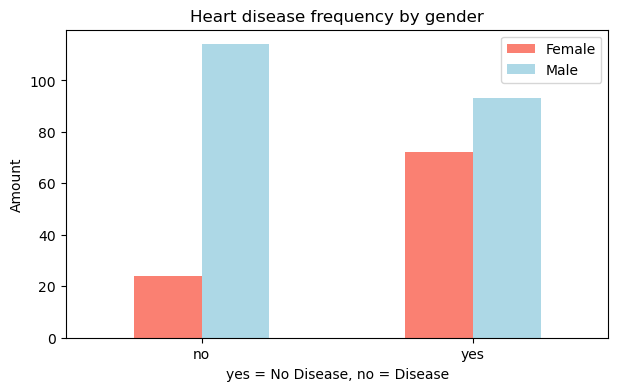

In [7]:
# compare sex column with target column
pd.crosstab(df.target, df.sex).plot(kind = "bar", 
                                   figsize =(7,4),
                                   color = ["salmon", "lightblue"])
plt.title("Heart disease frequency by gender")
plt.xlabel("yes = No Disease, no = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0)

##### Age Vs Max Heart Rate for Heart Disease

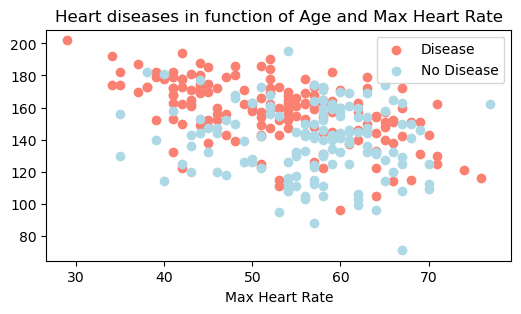

In [8]:
# create another figure
plt.figure(figsize=(6, 3))

# scattter with positive example
plt.scatter(df.age[df.target=="yes"],
            df.thalach[df.target=="yes"],
            c="salmon"
           )

# scattter with negative example
plt.scatter(df.age[df.target=="no"],
            df.thalach[df.target=="no"],
            c="lightblue"
           )
plt.title("Heart diseases in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.xlabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"])

<AxesSubplot:ylabel='Frequency'>

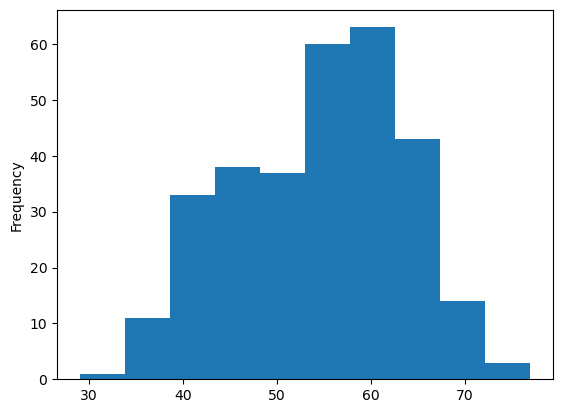

In [9]:
df.age.plot.hist()

Majority of our dataset's age range 40 to 60. our dataset is left skewed

#### Heart Disease Frequency per Chest Pain Type

cp- Chest-pain type: displays the type of chest-pain experienced by the individual using the following format : 

* 0 = typical angina 
* 1 = atypical angina 
* 2 = non — anginal pain 
* 3 = asymptotic

(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

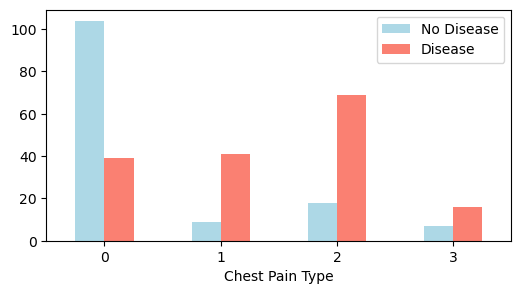

In [10]:
pd.crosstab(df.cp, df.target).plot(kind="bar", 
                                  figsize=(6, 3),
                                  color = ["lightblue","salmon"])
plt.xlabel("Chest Pain Type")
plt.legend(["No Disease","Disease"])
plt.xticks(rotation=0)

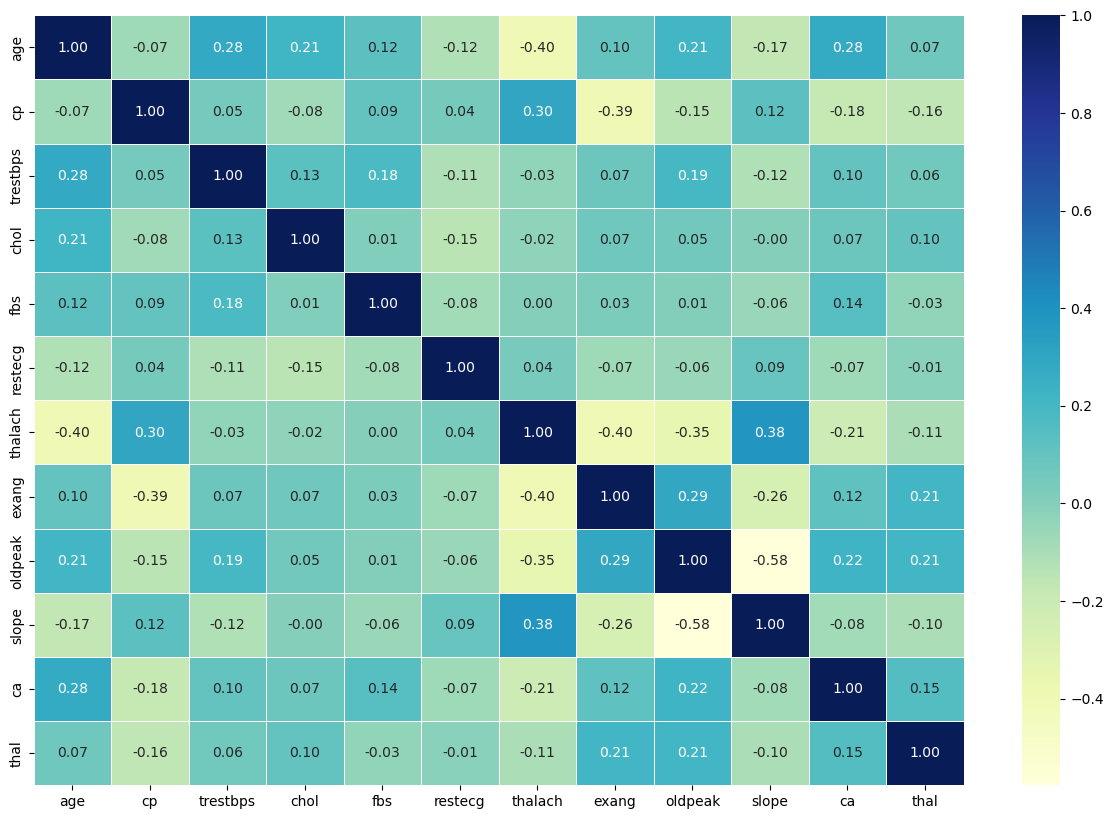

In [11]:
# make a correlation matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu")


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    int64  
 3   trestbps  299 non-null    float64
 4   chol      302 non-null    float64
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   298 non-null    float64
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    object 
dtypes: float64(4), int64(8), object(2)
memory usage: 33.3+ KB


In [13]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    4
chol        1
fbs         0
restecg     0
thalach     5
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

We have missing data in trestbps, col and thalach

In [14]:
df.dropna(inplace = True)
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [15]:
# Change the target and sex  column to numeric
cat_col = ["sex", "target"]
for col in cat_col:
    df[col] = pd.factorize(df[col])[0]
    df[col] = df[col].apply(lambda x: 1 if x==0 else 0)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1
1,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,1
2,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,1
3,56,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,1
5,57,1,0,140.0,192.0,0,1,148.0,0,0.4,1,0,1,1


In [16]:
# splitting data into X and y
X = df.drop("target", axis=1)
y = df.target

In [17]:
# splitting data into train and test sets
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [18]:
X_train.shape, X_test.shape, y_test.shape, y_train.shape

((234, 13), (59, 13), (59,), (234,))

1. logistic regresssion
2. K- Nearest Neighbour
3. Random Forest Classifier

In [19]:
# put models in a dictionary
models = {"Logistic Regression": LogisticRegression(max_iter=1000),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

# create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning model
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_tetst : test label
    """
    # set random seeed to  make sure our result is reproduceable
    np.random.seed(42)
    # make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # fit the model
        model.fit(X_train, y_train)
        # Evaluate the model adn append tis score to model_score
        model_scores[name] = model.score(X_test, y_test)
    return model_scores    

In [20]:
model_scores = fit_and_score(models = models, 
                             X_train = X_train, 
                              X_test = X_test,
                             y_train = y_train, 
                             y_test = y_test)

model_scores

{'Logistic Regression': 0.7966101694915254,
 'KNN': 0.6101694915254238,
 'Random Forest': 0.8305084745762712}

#### Model Comparison

<AxesSubplot:>

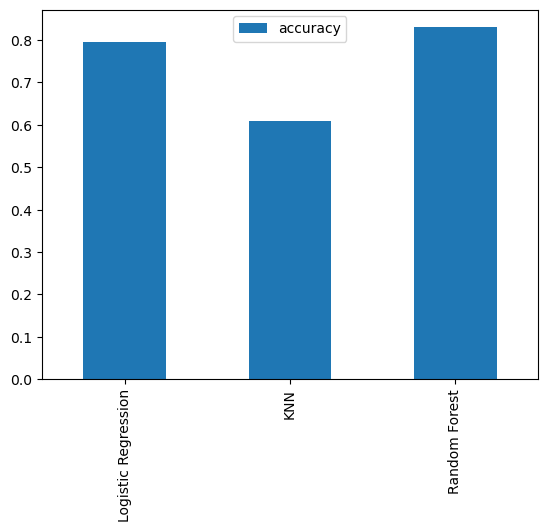

In [21]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar()

### Hyperparameter Tuning

In [22]:
train_scores = []
test_scores = []

# create a list of different values for KNN
neighbors = range(1, 21)

#Setup KNN instance

knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # fit the algorithms
    knn.fit(X_train, y_train)
    
    # Update the training score list
    train_scores.append(knn.score(X_train, y_train))
    
    # Uodate the test scores list
    test_scores.append(knn.score(X_test, y_test))


Maximum KNN score on the test Data :72.88%


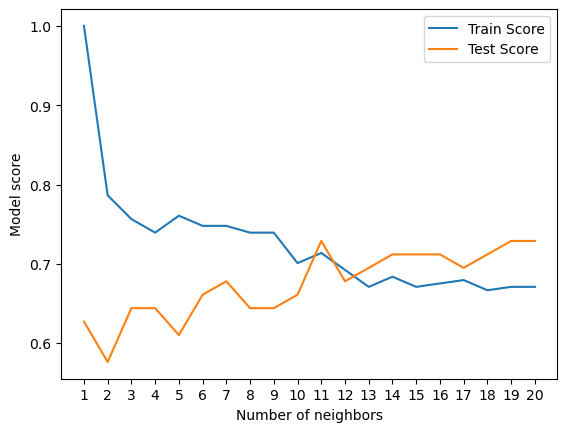

In [23]:
plt.plot(neighbors, train_scores, label="Train Score")
plt.plot(neighbors, test_scores, label="Test Score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test Data :{max(test_scores)*100:.2f}%")

### Hyperparameter tuning with RandomizedSearch CV

In [24]:
# create an hyperparamter grid for lofgistic regression
log_reg_grid = {"C": np.logspace(-4, 4, 20), 
                "solver":["liblinear"]
               }
# create an hypreparamter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth":[None, 3, 5, 10],
           "min_samples_split":np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)
          }

In [25]:
#k Tune logistic regresion
np.random.seed(42)

# Setup random hyperparameter search for logistic regresion
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter = 20,
                               verbose = True)

#Fit random hyperparameter search model for logistic regression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [26]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [27]:
rs_log_reg.score(X_test, y_test)

0.8135593220338984

Tuning the RandomForestClassifier

In [28]:
#set up random seed
np.random.seed(42)

# Setup random hyperparameter search for randomforestclassifer
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions = rf_grid,
                           cv=5,
                           n_iter = 50,
                               verbose = True)
#fit model for random classifiers
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [29]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 13,
 'max_depth': 3}

In [30]:
rs_rf.score(X_test, y_test), rs_rf.score(X_train, y_train)

(0.847457627118644, 0.8717948717948718)

### Using GridSearchCV

In [31]:
log_reg_grid = {"C": np.logspace(-4, 4,40),
                "solver":["liblinear"]
               }
# setup grid hyperparameter search for logisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(), 
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)
#fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.60371874e-04, 2.57191381e-04, 4.12462638e-04,
       6.61474064e-04, 1.06081836e-03, 1.70125428e-03, 2.72833338e-03,
       4.37547938e-03, 7.01703829e-03, 1.12533558e-02, 1.80472177e-02,
       2.89426612e-02, 4.64158883e-02, 7.44380301e-02, 1.19377664e-01,
       1.91448198e-01, 3.07029063e-01, 4.923882...652287e-01,
       1.26638017e+00, 2.03091762e+00, 3.25702066e+00, 5.22334507e+00,
       8.37677640e+00, 1.34339933e+01, 2.15443469e+01, 3.45510729e+01,
       5.54102033e+01, 8.88623816e+01, 1.42510267e+02, 2.28546386e+02,
       3.66524124e+02, 5.87801607e+02, 9.42668455e+02, 1.51177507e+03,
       2.42446202e+03, 3.88815518e+03, 6.23550734e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [32]:
gs_log_reg.best_params_

{'C': 0.30702906297578497, 'solver': 'liblinear'}

In [33]:
gs_log_reg.score(X_test, y_test)

0.8135593220338984

### Evaluating Machine learning classifier beyond accuracy
To make comparison and evaluate out train model, first we to make prediction

In [34]:
# make prediction with tuned model
y_preds = gs_log_reg.predict(X_test)
y_preds

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1], dtype=int64)

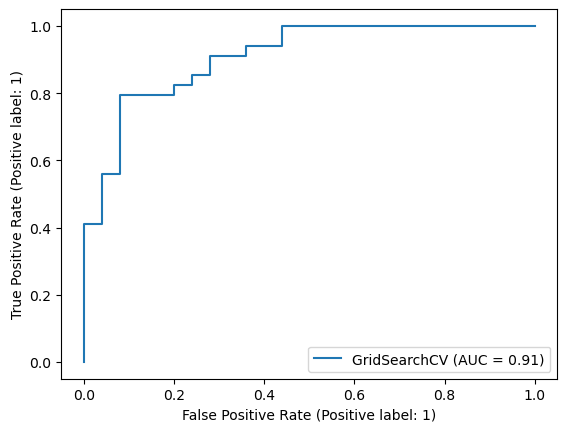

In [35]:
# plot ROC Curve and calculatet AUC metric
plot_roc_curve(gs_log_reg, X_test, y_test)

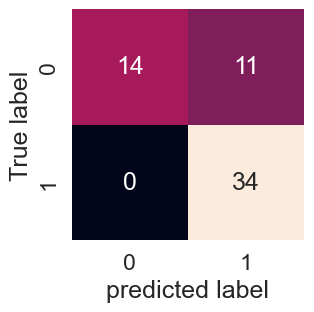

In [36]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """plot a nice looking confusion Matrix using seaborn's heatmap"""
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                         annot=True,
                         cbar=False)
    plt.ylabel("True label")
    plt.xlabel("predicted label")

plot_conf_mat(y_test, y_preds)

In [37]:
import sklearn
sklearn.__version__

'1.0.2'

In [38]:
## Classification report / cross validated precision
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      0.56      0.72        25
           1       0.76      1.00      0.86        34

    accuracy                           0.81        59
   macro avg       0.88      0.78      0.79        59
weighted avg       0.86      0.81      0.80        59



In [39]:
y_pred_rf = rs_rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      0.64      0.78        25
           1       0.79      1.00      0.88        34

    accuracy                           0.85        59
   macro avg       0.90      0.82      0.83        59
weighted avg       0.88      0.85      0.84        59



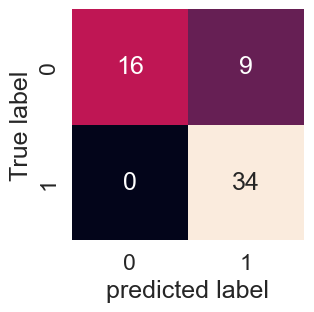

In [40]:
plot_conf_mat(y_test, y_pred_rf)

### calculate evaluation metrics using cross-validation

In [41]:
gs_log_reg.best_params_

{'C': 0.30702906297578497, 'solver': 'liblinear'}

In [44]:
# we create a new classisfier wit best parameter
clf = LogisticRegression(C= 0.30702906297578497, solver= 'liblinear')

In [60]:
#cross validated accuracy
cv_acc = cross_val_score(clf, 
                        X,
                        y,
                        cv=5,
                        scoring="accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

0.846113383985973

In [61]:
#cross validated precision
cv_precision = cross_val_score(clf, 
                        X,
                        y,
                        cv=5,
                        scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8250138921965547

In [72]:
#  validated recall
cv_recall = cross_val_score(clf, 
                        X,
                        y,
                        cv=5,
                        scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.91875

In [65]:
#  f1 score
cv_f1 = cross_val_score(clf, 
                        X,
                        y,
                        cv=5,
                        scoring="f1")
cv_f1 =  np.mean(cv_f1)

<AxesSubplot:title={'center':'Cross-validated classsification metrics'}>

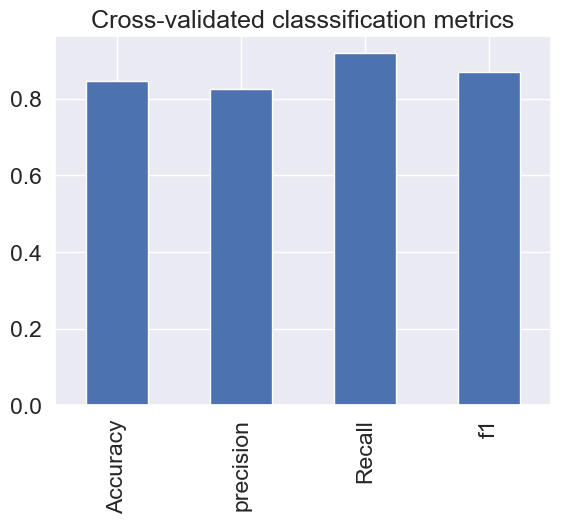

In [67]:
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                          "precision": cv_precision,
                          "Recall" : cv_recall,
                          "f1" : cv_f1}, index=[0])

cv_metrics.T.plot.bar(title ="Cross-validated classsification metrics",
                     legend = False)


### Feature Importance
Which of the feature ocontribute most to the outcome of the model and how do they  contribute

Finding feature importance si ddifferent for each macine learning model (We google "the model's feature importance" )

In [68]:
clf.fit(X_train, y_train)

LogisticRegression(C=0.30702906297578497, solver='liblinear')

In [69]:
#check coef_
clf.coef_

array([[ 0.01261132, -0.75293374,  0.68637063, -0.01247811, -0.00118417,
         0.00504198,  0.29093732,  0.02294144, -0.85247082, -0.56928733,
         0.39773862, -0.74106798, -0.61689021]])

In [73]:
# match coef'S of eature to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.012611319374587591,
 'sex': -0.7529337449089748,
 'cp': 0.6863706343762764,
 'trestbps': -0.012478107186271946,
 'chol': -0.0011841715586080202,
 'fbs': 0.0050419826523542075,
 'restecg': 0.2909373186698844,
 'thalach': 0.0229414379340807,
 'exang': -0.8524708217077313,
 'oldpeak': -0.5692873287767805,
 'slope': 0.39773861624679424,
 'ca': -0.7410679835516294,
 'thal': -0.6168902106324715}

<AxesSubplot:title={'center':'Feature Importance'}>

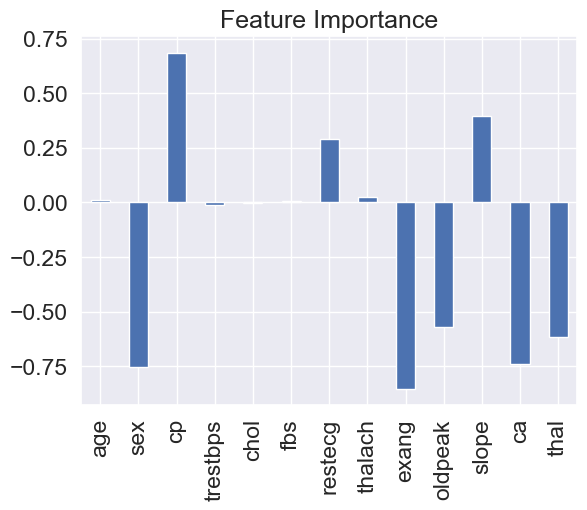

In [75]:
# visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False )

In [76]:
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,88,48
2,33,103


* slope- Slope of the peak exercise ST segment :
  *  0 = upsloping: better heart rate with excercise (uncommon) 
  *  1 = flat: minimal change (typical healthy heart) 
  * 2 = downsloping: signs of unhealthy heart

In [2]:
def neue(x):
    summe = 0
    for i  in range(x):
        if i % 7 == 0 and i % 3 != 0:
            summe += i 
    return summe

In [5]:
neue(20)

21